# Logistic Regression

## Outline

* Read Data
* The Logistic Regression Algorithm Details
    * The Cost Function
    * The Stochastic Grdaient Descent to Minimize the Cost Function
* Result Display
* Apply the Model on Test Data, Submission

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.special import expit
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import datetime
today = datetime.date.today()
print('Date = ',today)

Date =  2022-06-27


# Read Data

In [2]:
train_df=pd.read_csv('/content/drive/MyDrive/Machine_Learning_Self_Study/ML_Algorithm/Supervised Algorithm/Classification/Binary Classification Data/train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/Machine_Learning_Self_Study/ML_Algorithm/Supervised Algorithm/Classification/Binary Classification Data/test.csv')

In [3]:
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Id        800 non-null    int64
 1   laufkont  800 non-null    int64
 2   laufzeit  800 non-null    int64
 3   moral     800 non-null    int64
 4   verw      800 non-null    int64
 5   hoehe     800 non-null    int64
 6   sparkont  800 non-null    int64
 7   beszeit   800 non-null    int64
 8   rate      800 non-null    int64
 9   famges    800 non-null    int64
 10  buerge    800 non-null    int64
 11  wohnzeit  800 non-null    int64
 12  verm      800 non-null    int64
 13  alter     800 non-null    int64
 14  weitkred  800 non-null    int64
 15  wohn      800 non-null    int64
 16  bishkred  800 non-null    int64
 17  beruf     800 non-null    int64
 18  pers      800 non-null    int64
 19  telef     800 non-null    int64
 20  gastarb   800 non-null    int64
 21  kredit    800 non-null    int64
dtypes:

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Id        200 non-null    int64
 1   laufkont  200 non-null    int64
 2   laufzeit  200 non-null    int64
 3   moral     200 non-null    int64
 4   verw      200 non-null    int64
 5   hoehe     200 non-null    int64
 6   sparkont  200 non-null    int64
 7   beszeit   200 non-null    int64
 8   rate      200 non-null    int64
 9   famges    200 non-null    int64
 10  buerge    200 non-null    int64
 11  wohnzeit  200 non-null    int64
 12  verm      200 non-null    int64
 13  alter     200 non-null    int64
 14  weitkred  200 non-null    int64
 15  wohn      200 non-null    int64
 16  bishkred  200 non-null    int64
 17  beruf     200 non-null    int64
 18  pers      200 non-null    int64
 19  telef     200 non-null    int64
 20  gastarb   200 non-null    int64
dtypes: int64(21)
memory usage: 32.9 KB


None

In [4]:
# X,y split
y_col='kredit'
id_col='Id'
X=train_df.drop(columns=[y_col,id_col])
y=train_df[y_col]

# drop the id_col for test_df
test_df=test_df.drop(columns=[id_col])

In [5]:
# standard scaler
def df_scale(X,test_df):
  scaler = StandardScaler()
  scaler.fit(X)
  X_scale=X.copy()
  X_scale[:]=scaler.transform(X)
  test_df_scale=test_df.copy()
  test_df_scale[:]=scaler.transform(test_df)
  return X_scale, test_df_scale

# scaling
X_scale, test_df_scale=df_scale(X,test_df)

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scale, y, test_size=0.3, random_state=42)

In [7]:
y_train.value_counts()

1    424
0    136
Name: kredit, dtype: int64

# The Logistic Regression Algorithm

![](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

![link text](https://github.com/Bhardwaj-Saurabh/Machine_Learning_Specialization_AndrewNG_Coursera/raw/0c8f6ce911e1dd650a046836b9824e69b833e2bf/Supervised%20Machine%20Learning%20Regression%20and%20Classification/Weel_3_Lab/images/C1_W3_LogisticGradientRegularized.png)



## The Cost Function for Logistic Regression with L2 Norm

$ J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3} $

And,

$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $

In [13]:
def cost_LR(X,y,w,lambda_):
  """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters 
      z_i= w * x_i (for i-th point, i belongs to m) 
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """
  m,n=X.shape
  # iterate over m points
  cost=0.
  for i in range(m):
    z_i=np.dot(X[i],w)
    f_i=expit(z_i)
    cost += -y[i]*np.log(f_i) - (1-y[i])*np.log(1-f_i)
  cost=cost/m

  # iter over n features for L2 norm 
  l2_norm=0.
  for j in range(n):
    l2_norm += w[j]**2
  l2_norm=(lambda_/(2*m)) * l2_norm    

  # total cost
  total_cost = cost + l2_norm  

  return total_cost

## Gradient Descent for Cost Function J

$ \begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*} $

And GD will be:

$ 
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j $

SGD will be:

$ 
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  =  (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  {\lambda} w_j 
$

In [20]:
def compute_gradient_logistic_reg(X, y, lambda_,alpha,iters): 
  cost_array={}
  """
  Computes the gradient for linear regression 

  Args:
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters  
    lambda_ (scalar): Controls amount of regularization
  Returns
    dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w
  """
  # convert it to np array
  X=X.values
  y=y.values
  # add an extra column in X for interecpt
  X=np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
  m,n=X.shape
  # initialize w
  w=np.zeros(n)

  # iter to converge
  for iter in range(iters):
    for i in range(m):
      z_i=np.dot(X[i],w)
      f_i=expit(z_i)
      err_i  = f_i  - y[i]
      dj_dw=np.dot(err_i,X[i])+lambda_*w
      w=w-alpha*dj_dw
      cost=cost_LR(X,y,w,lambda_)
      cost_array[iter]=cost
      #print(iter,i)
  
  return w, cost_array

In [94]:
# function for: display the cost-iter trend
def plot_cost_iter(cost_array):
  iters=cost_array.keys()
  cost=cost_array.values()
  fig=sns.scatterplot(x=iters,y=cost)
  fig.set_xlabel('iters')
  fig.set_ylabel('cost')
  fig.set_title('Cost Function - # of Iterations')


In [93]:
w_SGD,cost_SGD=compute_gradient_logistic_reg(X=X_train,
                              y=y_train,
                              lambda_=0.01,
                              alpha=0.002,
                              iters=30)

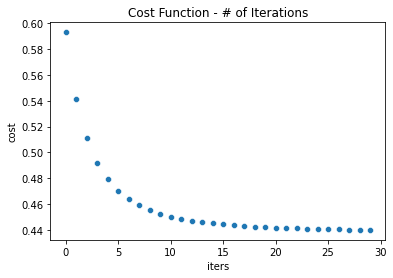

In [96]:
# plot the Cost Function Change over Iterations
plot_cost_iter(cost_array=cost_SGD)

In [105]:
# scatterplot the y_pred and y_actual, display the MSE, theta
def confusion_matrix(theta,X_test,y_test):
  # add an extra column in X for interecpt
  X_test=np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1)
  #
  z_i=np.matmul(X_test,theta.T)
  f_i=expit(z_i)
  y_test_pred=np.where(f_i>0.5,1,0)

  # plot the graph
  fig,ax1=plt.subplots(figsize=(5,5))
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,ax=ax1)
  ax1.set_title('Confusion Matrix for Prediction Result')
  return y_test_pred

# Model Result

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

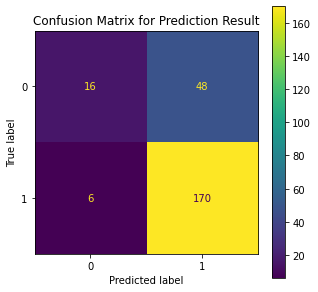

In [106]:
confusion_matrix(theta=w_SGD,
                 X_test=X_test,
                 y_test=y_test)

In [107]:
# The LR coefficient plot
def weight_plot(w,X):
  col_name=list(X.columns)
  coef=w[1:]
  fig,ax1=plt.subplots(figsize=(5,9))
  sns.barplot(x=coef,y=col_name,color='green',ax=ax1)
  ax1.set_title('Coefficient Plot for Logistic Regression')


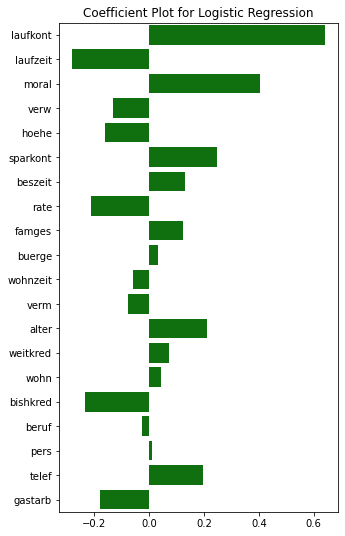

In [108]:
weight_plot(w=w_SGD,
            X=X_train)

# Apply it on test df

In [111]:
test_df=pd.read_csv('/content/drive/MyDrive/Machine_Learning_Self_Study/ML_Algorithm/Supervised Algorithm/Classification/Binary Classification Data/test.csv')

In [116]:
def test_submission(w_SGD,test_df_scale,test_df):
  # generate the y_pred_label
  X_test=np.concatenate((np.ones((test_df_scale.shape[0],1)), test_df_scale), axis=1)
  z_i=np.matmul(X_test,w_SGD.T)
  f_i=expit(z_i)
  y_test_pred=np.where(f_i>0.5,1,0)
  # create df for submission
  df_submit=pd.DataFrame()
  df_submit['Id']=test_df['Id']
  df_submit['kredit']=y_test_pred
  return df_submit


In [117]:
df_submit=test_submission(w_SGD,test_df_scale,test_df)

In [122]:
df_submit.to_csv('df_submit.csv',index=False)